# Regression: Measures for In-Sample Evaluation
A way to numerically determine how good the model fits the dataset

Two common measures to determine the fit of a model:
1. R-squared ($R^2$)
2. MSE (Mean Squared Error)

$R^2$ quantifies how much the dependent variable is determined by the independent variables, in terms of proportion of variance. $R^2$ has an upper bound of 1 which represents the perfect fit.

No consensus has been reached on a single, unified, standard metric to assess the results of the regression itself. In addition to the model explanation expressed as the variance (R-squared), another widely adopted family of measures evaluate the quality of fit in terms of distance of the regressor to the actual training points.
These include the mean square error (MSE) and its rooted variant (RMSE), or the mean absolute error (MAE) and its percentage variant (MAPE). These rates share a common drawback: since their values can range between zero and +infinity. 
As a rule of thumb, MSE is more sensitive to outliers than MAE (because of squaring of error). 

Although useful, single value of these metrics does not say much about the performance of the regression with respect to the distribution of the ground truth elements.In addition to looking at these metrics, several other considerations need to be taken into account based on the goal of the prediction. 

**Goal:** Let's evaluate R-squared and MSE metrics for different models trained on the same dataset and compare to results to see which model gives us better score and lower error.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from PP_utils import data_plotting, ds_statistics
from importlib import reload
reload(data_plotting)
plt.style.use('PP_utils/deeplearning.mplstyle')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading the data set

In [3]:
df = pd.read_csv('data/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Model 1: Simple Linear Regression
Predict Price using just one independent variable - 'highway-mpg'

In [4]:
x = df[['highway-mpg']] # x must be 2D
y = df['price']

In [5]:
lr = LinearRegression()
lr.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
lr.intercept_,lr.coef_

(np.float64(38423.3058581574), array([-821.73337832]))

In [7]:
lr.score(x,y) # get default scoring metric (R-squared for linear regression)

0.4965911884339176

In [8]:
y_pred = lr.predict(x)


In [9]:
print(r2_score(y,y_pred)) # result should match with result of score metric we got above
print(f'{mean_squared_error(y,y_pred):.2e}')

0.4965911884339176
3.16e+07


R-squared:           0.4966
Mean Squared Error:  3.16e+07
Mean Absolute Error: 4.05e+03


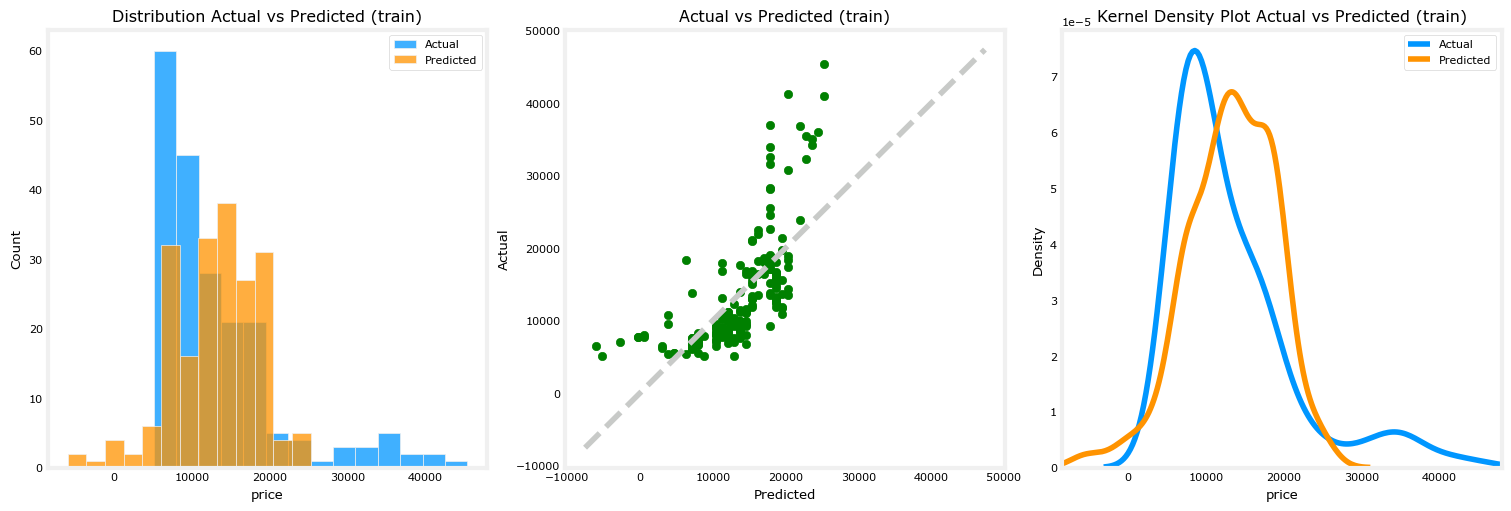

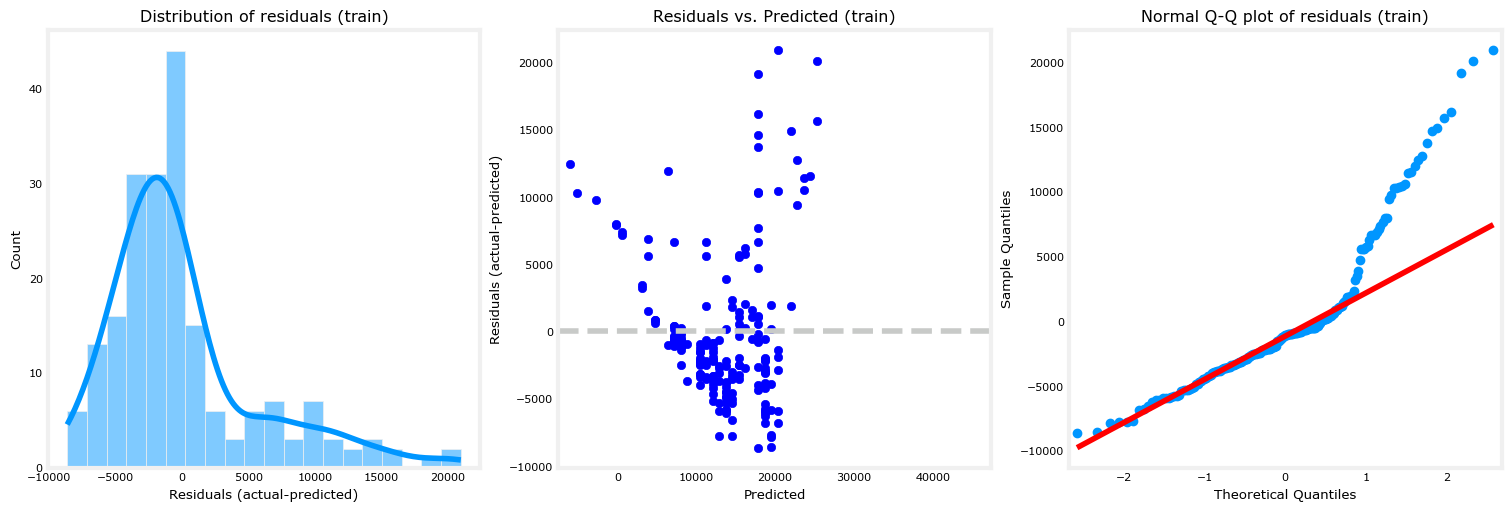

In [10]:
data_plotting.plot_actual_vs_predicted(y,y_pred,data_label='(train)')

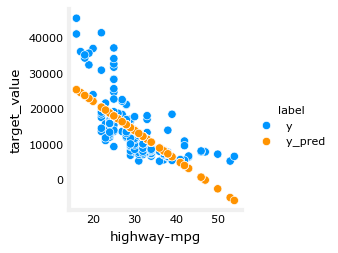

In [11]:
data_plotting.plot_prediction_by_feature(x,y,y_pred,['highway-mpg'])

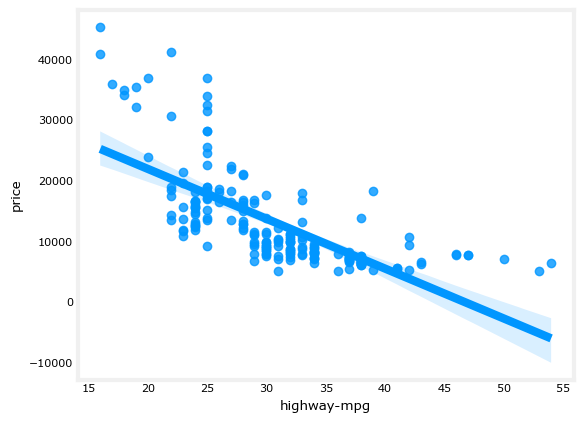

In [12]:
sns.regplot(df,x='highway-mpg',y='price')
plt.show()

### Model 2: Multiple Linear Regression
Let's built a model using these features:
'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'


In [13]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']


In [14]:
pipe = Pipeline([('scaler',StandardScaler()),('lm',LinearRegression())])
pipe.fit(X,y)


,steps,"[('scaler', ...), ('lm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [15]:
pipe.named_steps['lm'].intercept_, pipe.named_steps['lm'].coef_


(np.float64(13207.12935323383),
 array([1993.92730063, 2429.21285448, 3378.88768706,  245.12514386]))

In [16]:
pipe.named_steps['lm'].score(X,y) # R-squared

-779118.2640621569

.score should have given us R-squared value but the value doesn't look right. Seems like we we need to provide normalized X to the score method instead of raw values because we are executing this method without the full pipeline. Alternative method would be to use r2_score function on predicted values. Let's try and see if that works.

In [ ]:
pipe.score(X,y) # pipe.score gives us correct values 

0.8093562806577457

In [29]:
y_pred2 = pipe.predict(X)

In [30]:
print(r2_score(y,y_pred2))
print(f'{mean_squared_error(y,y_pred2):.2e}')

0.8093562806577457
1.20e+07


This looks like much more reasonable value for R-squared. Let's confirm our theory about the need for normalized X by doing all the steps of modeling without the pipeline.

In [260]:
# executing each step individually instead of a pipeline
ss = StandardScaler()
X_norm = ss.fit_transform(X)
lm2 = LinearRegression()
lm2.fit(X_norm,y)

LinearRegression()

In [261]:
lm2.score(X,y)

-779118.2640621573

In [262]:
y_pred3 = lm2.predict(X)

In [263]:
r2_score(y,y_pred3)

-779118.2640621573

r2_score result is now matching what we saw earlier. 

In [264]:
y_pred4 = lm2.predict(X_norm)
r2_score(y,y_pred4)

0.8093562806577457

Upon using normalized values of X, we get the same r2_score that we got when we used the pipeline. This confirms that when using pipeline, it is best not to use .score method because otherwise we have to do all the transformation steps for X manually just to call this method. It is best to use r2_score function instead which directly uses the predicted values from the pipeline.

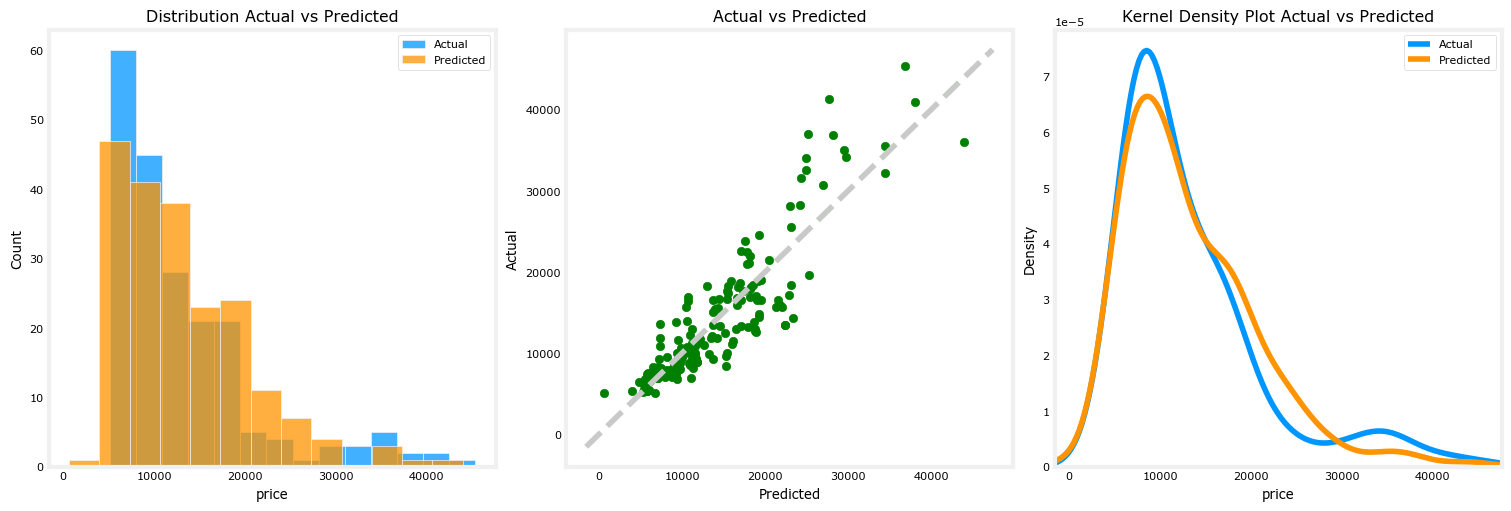

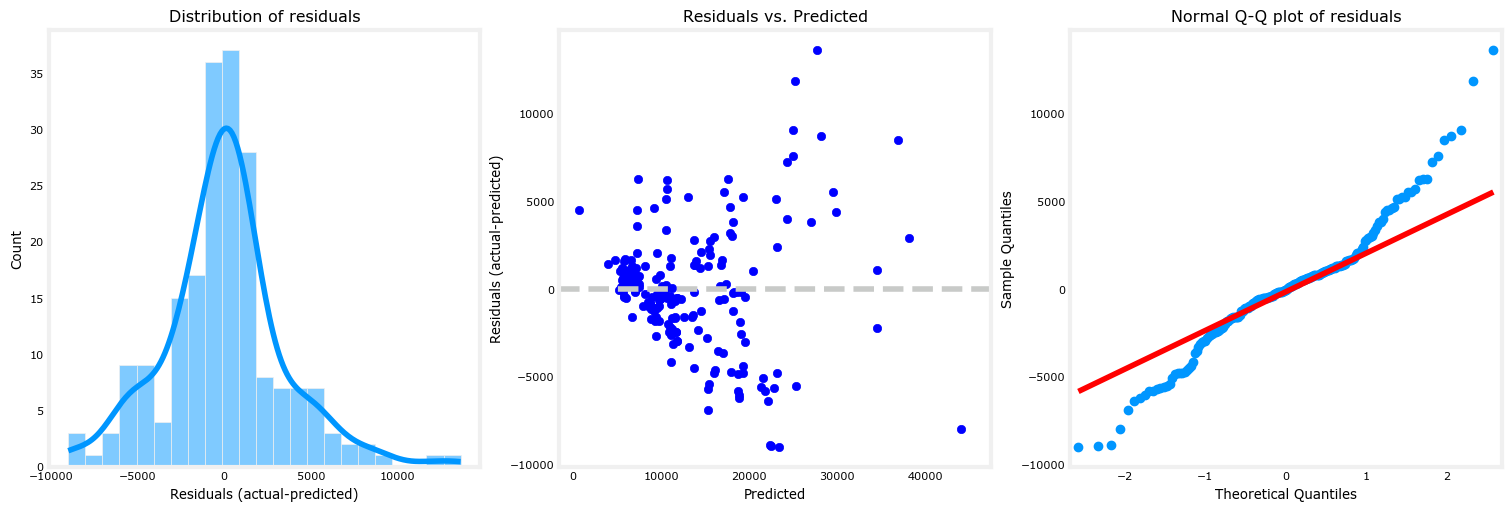

In [274]:
data_plotting.plot_actual_vs_predicted(y,y_pred2)

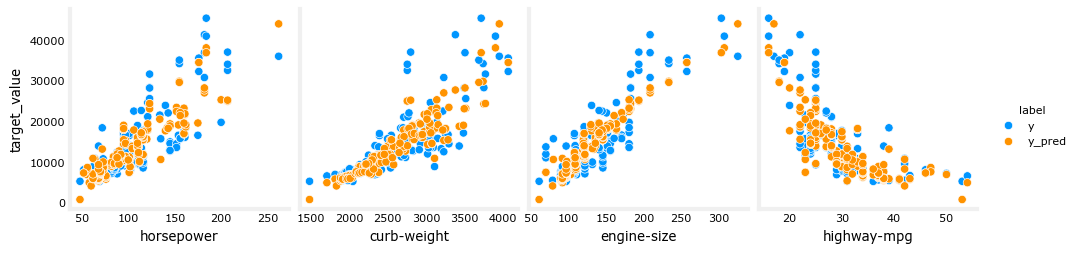

In [228]:
data_plotting.plot_prediction_by_feature(X,y,y_pred2,X.columns.to_list())

In [229]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [26]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.to_list()
numeric_cols

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'city-L/100km',
 'diesel',
 'gas']

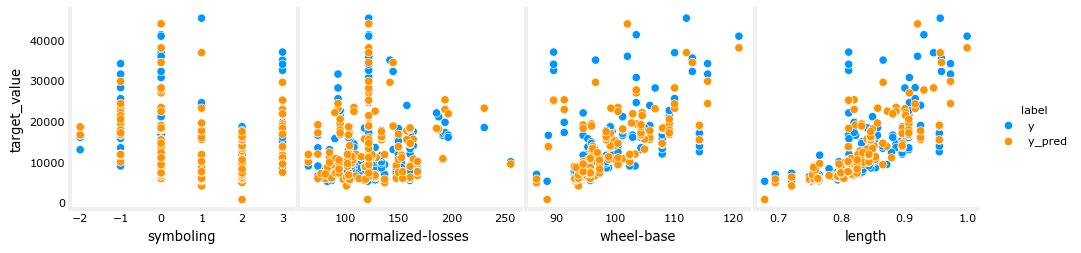

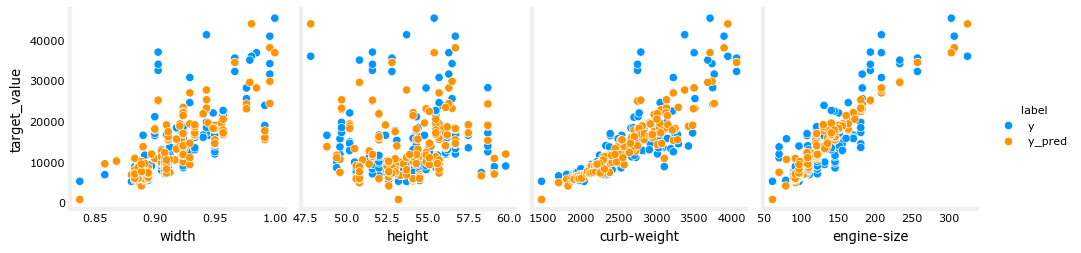

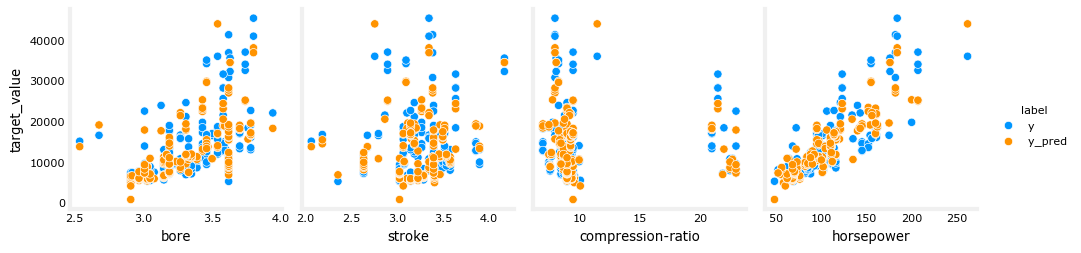

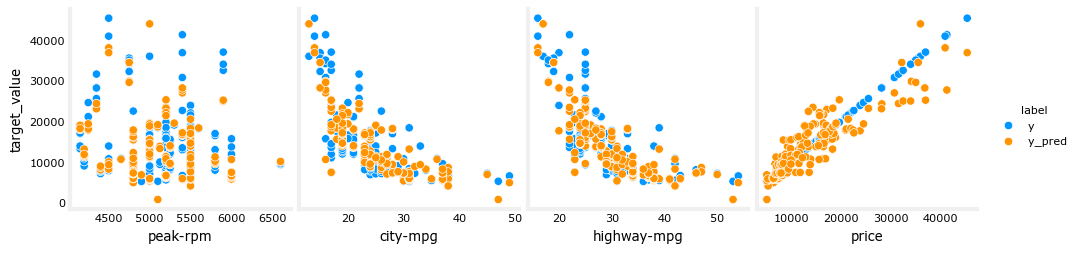

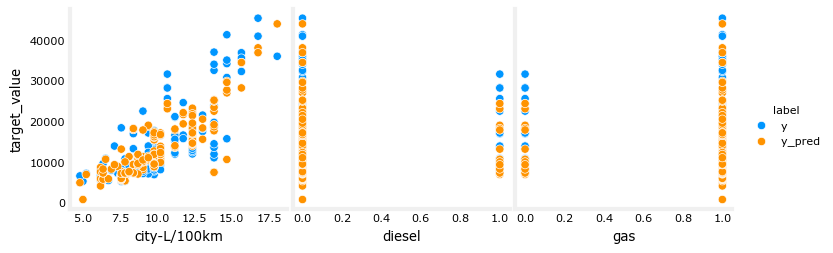

In [300]:
data_plotting.plot_prediction_by_feature(df[numeric_cols],y,y_pred2,df[numeric_cols].columns.to_list())

### Model 3: Polynomial Regression with one dimension
Predict Price using just one independent variable - 'highway-mpg'

In [283]:
x=df['highway-mpg'] # needs to be 1 dimensional
y=df['price']


In [284]:
coef = np.polyfit(x,y,deg=3)
coef

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [285]:
pr = np.poly1d(coef)
print(pr)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [286]:
y_pred5 = pr(x)

In [287]:
print(r2_score(y,y_pred5))
print(f'{mean_squared_error(y, y_pred5):.2e}')

0.674194666390652
2.05e+07


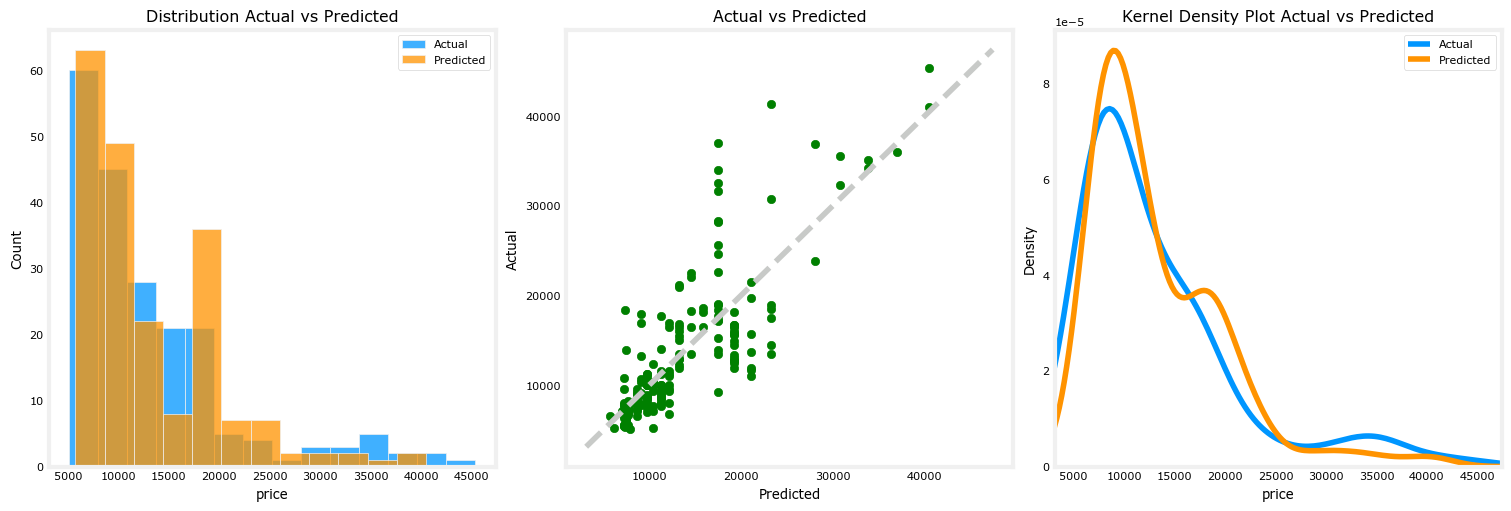

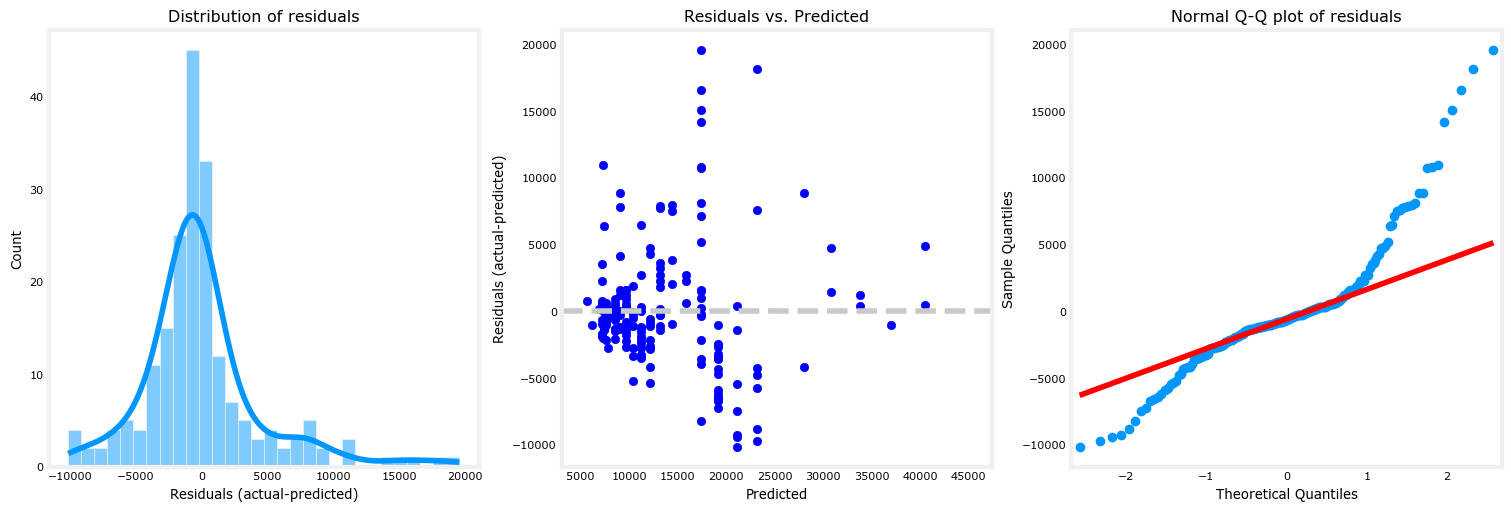

In [288]:
data_plotting.plot_actual_vs_predicted(y,y_pred5)

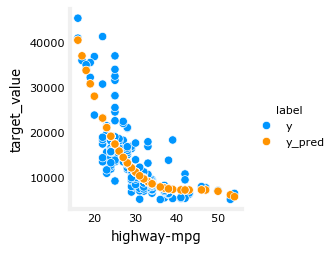

In [236]:
data_plotting.plot_prediction_by_feature(x,y,y_pred5,features=['highway-mpg'])

Prediction is done using 100 values of highway-mpg 
    in the range between 15 and 55 both inclusive. 
    These values are generated using np.linspace(15,55,100)


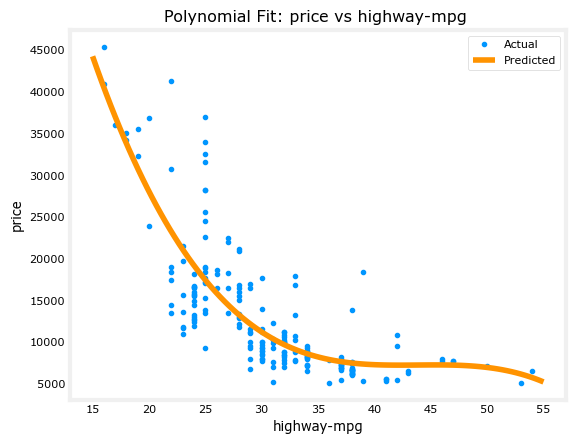

In [320]:
data_plotting.plot_poly_reg_1d(x,y,3,'highway-mpg','price',x_range=[15,55])

### Model 4: Polynomial Regression with Multiple Dimensions
Let's built a model using these features:
'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'

In [53]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']


In [54]:
pipe = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), StandardScaler(), LinearRegression())
pipe.fit(X,y)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,False
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [55]:
y_pred6 = pipe.predict(X)

In [56]:
print(r2_score(y,y_pred6))
print(f'{mean_squared_error(y,y_pred6):.2e}')

0.8953188125760434
6.58e+06


R-squared:           0.8953
Mean Squared Error:  6.58e+06
Mean Absolute Error: 1.71e+03


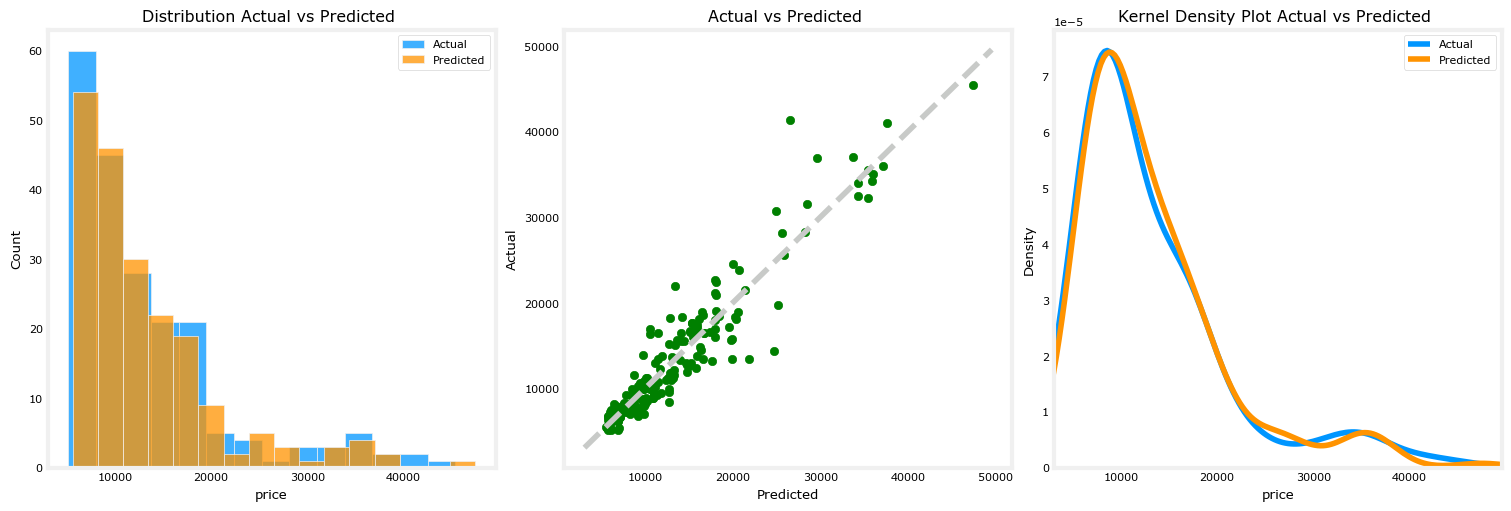

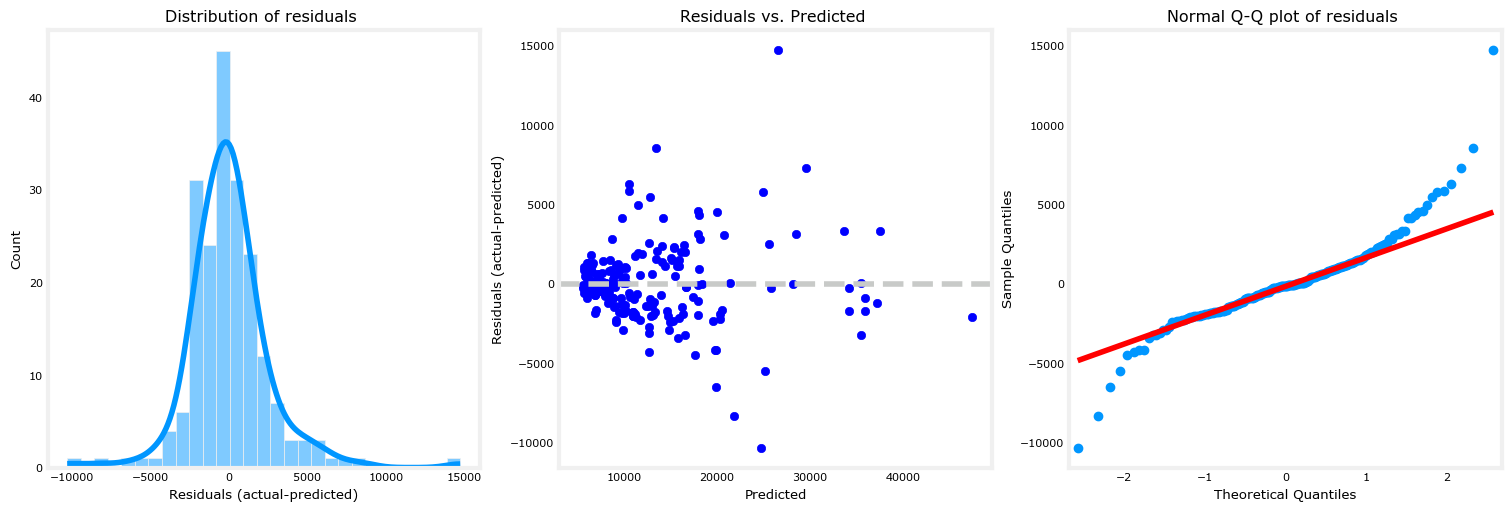

Tests for Homoscedasticity of residuals:
----------------------------------------
test methods                        statistic    p-value  result
--------------------------------  -----------  ---------  ---------
White’s_Lagrange_Multiplier_Test      43.6662     0.0001  reject H0
F-Test                                 3.6873     0       reject H0


    'result' is based on significance level of 0.05 
    Given X = explanatory variables
    Null (H0): Homoscedasticity is present (residuals are equally scattered, and its' variance doesn't depend on X)
    Alternative (H1): Heteroscedasticity is present (residuals are not equally scattered, it's variance depends on X)
              
Tests for normality of residuals:
---------------------------------
test methods                     statistic  p-value*    result
-----------------------------  -----------  ----------  ---------
1.Kolmogorov-Smirnov test           0.1049  0.0223      reject H0
2.Shapiro-Wilk test                 0.9015  0.

In [62]:
reload(data_plotting)
reload(ds_statistics)
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']


data_plotting.plot_actual_vs_predicted(X,y,y_pred6)

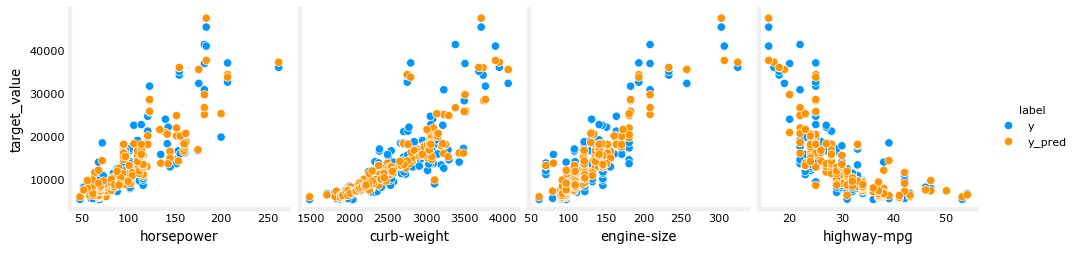

In [ ]:
data_plotting.plot_prediction_by_feature(X,y,y_pred6,X.columns.to_list())

### Comparion of the models
<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>3rd degree Polynomial Fit with 1 dimension: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

<p>3rd degree Polynomial Fit with multiple dimensions: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.8953188125760441</li>
    <li>MSE: 6.58 x 10^6</li>
</ul>
</p>

## Conclusion
<p>Comparing these three models, we conclude that <b>the 3rd degree Polynomial Fit with multiple dimensions is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>

### Author
Puneet Pawar